In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import importlib
rf = importlib.import_module("random-forests")
mushroom = np.loadtxt("agaricus-lepiota.data", dtype=str, delimiter=",")


In [2]:
# Clean data removing rows with missing labels
# In data description only feature 11 had missing vals
missing_barr = mushroom[:,11] == '?'
mushroom_cleaned = mushroom[np.logical_not(missing_barr), :]
# Extract the data X and corresponding labels y
X_mushroom, y_mushroom = mushroom_cleaned[:, 1:], mushroom_cleaned[:, 0]
# Make a test-train split, stratified by labels
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(
    X_mushroom, y_mushroom, stratify=y_mushroom)

In [13]:
# 22 features so will vary m_features=1, 2, 4, 7, 10, 13, 16, 19, 22
# try each with n_candidates=1, 2, 6, 10
# with n_trees=10, 50, 100
m_features = [1, 2, 4, 7, 10, 13, 16, 19, 22]
n_candidates = [1, 2, 6, 10]
ntrees = [10, 50, 100]
dict_misclass = {}
for ntree in ntrees:
    misclass_rates = np.zeros((4, 9))
    for i, n in enumerate(n_candidates):
        for j, m in enumerate(m_features):
            random_forest = rf.RandomForest(n_trees=ntree, max_depth=10, min_leaf_size=1, n_candidates=n, criterion="gini")
            random_forest.fit(X_m_train, y_m_train, feature_type="categorical", m_features=m)
            predicted = random_forest.predict(X_m_test)
            misclass_rates[i, j] = rf.random_forests.misclassification_rate(
                predicted, y_m_test)
    dict_misclass[ntree] = misclass_rates


Also do for n_candidates=50

In [170]:
m_features = [1, 2, 4, 7, 10, 13, 16, 19, 22]
n = 50
ntrees = [10, 50, 100]
for ntree in ntrees:
    nfeats50 = np.zeros(9)
    for j, m in enumerate(m_features):
        random_forest = rf.RandomForest(n_trees=ntree, max_depth=10, min_leaf_size=1, n_candidates=n, criterion="gini")
        random_forest.fit(X_m_train, y_m_train, feature_type="categorical", m_features=m)
        predicted = random_forest.predict(X_m_test)
        nfeats50[j] = rf.random_forests.misclassification_rate(
            predicted, y_m_test)
    dict_misclass[ntree] = np.append(dict_misclass[ntree], [nfeats50], axis=0)

In [184]:
import pickle
po = open("vary_m_feats_mushrooms_results.pickle", "wb")
pickle.dump(dict_misclass, po)
po.close()

In [206]:
m_features = [1, 2, 4, 7, 10, 13, 16, 19, 22]
n_candidates = [1, 2, 6, 10, 50]
ntrees = [10, 50, 100]

(1.0, 22.0, 0.0, 1.0)

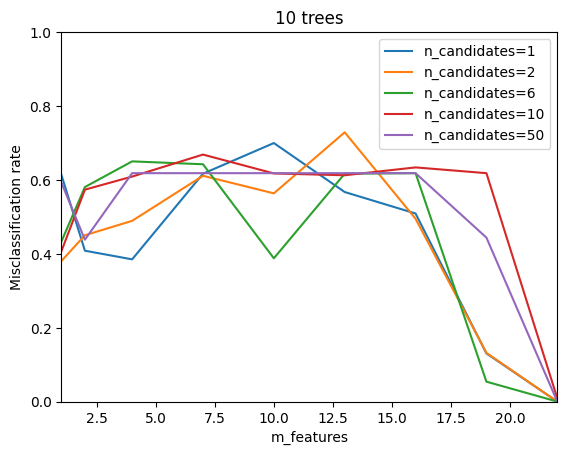

In [189]:
t = 10
for i in range(5):
    plt.plot(m_features, dict_misclass[t][i,:], label=f"n_candidates={n_candidates[i]}")
plt.legend()
plt.title(f"{t} trees")
plt.ylabel("Misclassification rate")
plt.xlabel("m_features")
plt.axis([1,22,0,1])

(1.0, 22.0, 0.0, 1.0)

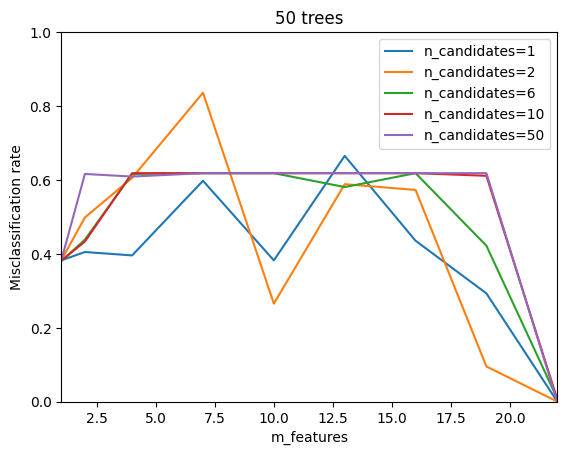

In [209]:
t = 50
for i in range(5):
    plt.plot(m_features, dict_misclass[t][i,:], label=f"n_candidates={n_candidates[i]}")
plt.legend(loc="upper right")
plt.title(f"{t} trees")
plt.ylabel("Misclassification rate")
plt.xlabel("m_features")
plt.axis([1,22,0,1])

(1.0, 22.0, 0.0, 1.0)

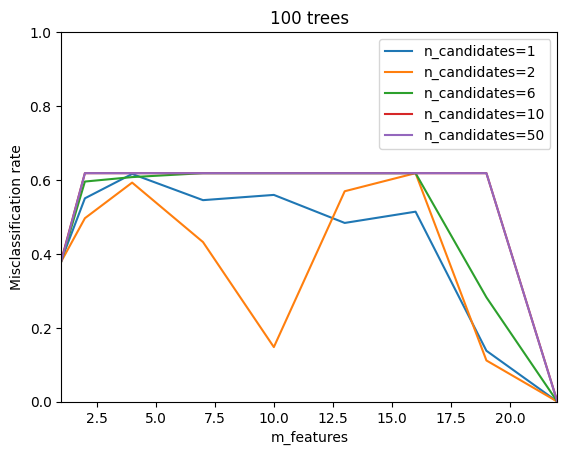

In [191]:
t = 100
for i in range(5):
    plt.plot(m_features, dict_misclass[t][i,:], label=f"n_candidates={n_candidates[i]}")
plt.legend()
plt.title(f"{t} trees")
plt.ylabel("Misclassification rate")
plt.xlabel("m_features")
plt.axis([1,22,0,1])

In [194]:
import pandas as pd
iris = pd.read_csv("iris_csv.csv")


In [195]:
iris = iris.to_numpy()

In [196]:
iris.shape

(150, 5)

In [197]:
# Extract the data X and corresponding labels y
X_iris, y_iris = iris[:, :4], iris[:, 4]


In [198]:
# Make a test-train split, stratified by labels
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(
    X_iris, y_iris, stratify=y_iris)

In [200]:
# 4 features so will vary m_features=1, 2, 3, 4
# try each with n_candidates=1, 2, 6, 10, 50
# with n_trees=10, 50, 100
m_features = [1, 2, 3, 4]
n_candidates = [1, 2, 6, 10, 50]
ntrees = [10, 50, 100]
dict_misclass_iris = {}
for ntree in ntrees:
    misclass_rates = np.zeros((5, 4))
    for i, n in enumerate(n_candidates):
        for j, m in enumerate(m_features):
            random_forest = rf.RandomForest(n_trees=ntree, max_depth=10, min_leaf_size=1, n_candidates=n, criterion="gini")
            random_forest.fit(X_i_train, y_i_train, feature_type="continuous", m_features=m)
            predicted = random_forest.predict(X_i_test)
            misclass_rates[i, j] = rf.random_forests.misclassification_rate(
                predicted, y_i_test)
    dict_misclass_iris[ntree] = misclass_rates


(1.0, 4.0, 0.0, 1.0)

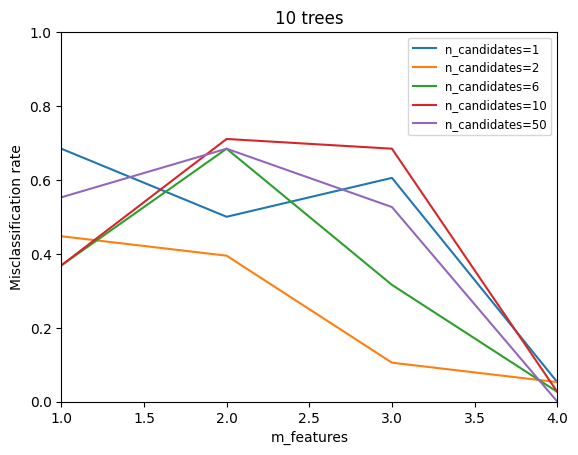

In [214]:
m_features = [1, 2, 3, 4]
t = 10
for i in range(5):
    plt.plot(m_features, dict_misclass_iris[t][i,:], label=f"n_candidates={n_candidates[i]}")
plt.legend(loc="upper right", fontsize="small")
plt.title(f"{t} trees")
plt.ylabel("Misclassification rate")
plt.xlabel("m_features")
plt.axis([1,4,0,1])

(1.0, 4.0, 0.0, 1.0)

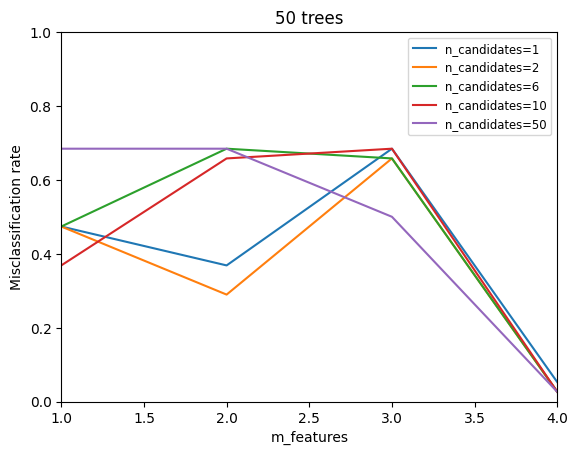

In [215]:
t = 50
for i in range(5):
    plt.plot(m_features, dict_misclass_iris[t][i,:], label=f"n_candidates={n_candidates[i]}")
plt.legend(loc="upper right", fontsize="small")
plt.title(f"{t} trees")
plt.ylabel("Misclassification rate")
plt.xlabel("m_features")
plt.axis([1,4,0,1])

(1.0, 4.0, 0.0, 1.0)

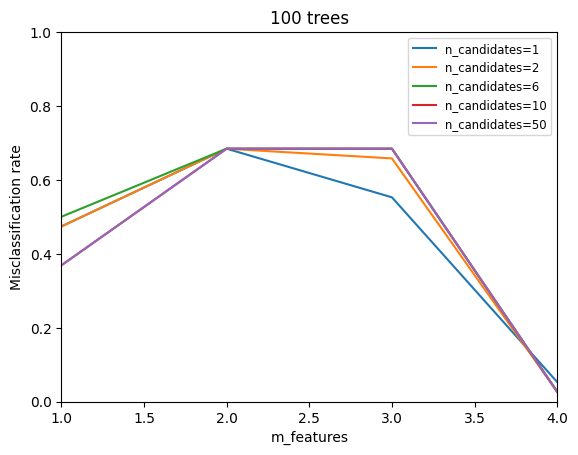

In [216]:
t = 100
for i in range(5):
    plt.plot(m_features, dict_misclass_iris[t][i,:], label=f"n_candidates={n_candidates[i]}")
plt.legend(loc="upper right", fontsize="small")
plt.title(f"{t} trees")
plt.ylabel("Misclassification rate")
plt.xlabel("m_features")
plt.axis([1,4,0,1])

In [217]:
import pickle
po = open("vary_m_feats_iris_results.pickle", "wb")
pickle.dump(dict_misclass_iris, po)
po.close()